<center> <font color="red" size=6> Exploratory Data Analysis <br>
    Boney Simon

<font  color="blue" size=3>Author: Boney Simon <br>
    Project: House Price Predictor <br>
    Dataset: Beijing dataset , source : kaggle

#  Import packages

In [1]:
# Data Manipulation
library(dplyr)
library(purrr)# map_df()
library(tidyr)# gather()

#Data Visualisation
library(ggplot2)
library(corrplot)# correlation plot



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.84 loaded



#  Import dataset-Beijing

In [2]:
data<-read.csv("C:/Users/user/Documents/GitHub/datasets/Dataset 3 Beijing/beijing.csv")

# EDA

In [3]:
print(dim(data))
print(dim(select_if(data,is.numeric)))
print(dim(select_if(data,is.factor)))

[1] 318851     26
[1] 318851     18
[1] 318851      8


<font color="red" size=3>There are 18 numeric and 8 categorical features in the dataset in the initially

In [4]:
head(data[2:26],3)

,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,...,<dbl>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,101084782030,116.4755,40.01952,1.111027e+12,2016-08-09,1464,106,415,31680,131.00,...,1,2005,3,6,0.217,1,0,1,7,56021
2,101086012217,116.4539,39.88153,1.111027e+12,2016-07-28,903,126,575,43436,132.38,...,1,2004,4,6,0.667,1,1,0,7,71539
3,101086041636,116.5620,39.87714,1.111041e+12,2016-12-11,1271,48,1030,52021,198.00,...,4,2005,3,6,0.500,1,0,0,7,48160


In [5]:
str(data)

'data.frame':	318851 obs. of  26 variables:
 $ url                : Factor w/ 318851 levels "https://bj.lianjia.com/chengjiao/101084782030.html",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ id                 : Factor w/ 318851 levels "101084782030",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Lng                : num  116 116 117 116 116 ...
 $ Lat                : num  40 39.9 39.9 40.1 39.9 ...
 $ Cid                : num  1.11e+12 1.11e+12 1.11e+12 1.11e+12 1.11e+12 ...
 $ tradeTime          : Factor w/ 2560 levels "2002-06-01","2002-07-06",..: 2046 2034 2170 2098 2065 2028 2020 2075 2072 2073 ...
 $ DOM                : num  1464 903 1271 965 927 ...
 $ followers          : int  106 126 48 138 286 57 167 138 218 134 ...
 $ totalPrice         : num  415 575 1030 298 392 ...
 $ price              : int  31680 43436 52021 22202 48396 52000 37672 49521 27917 55883 ...
 $ square             : num  131 132 198 134 81 ...
 $ livingRoom         : Factor w/ 11 levels "#NAME?","0","1",..: 4 4 5 5 4 3 4 5 3 3 ...
 $ 

In [6]:
colSums(is.na(data))

url                  id                 Lng                 Lat 
                  0                   0                   0                   0 
                Cid           tradeTime                 DOM           followers 
                  0                   0              157977                   0 
         totalPrice               price              square          livingRoom 
                  0                   0                   0                   0 
        drawingRoom             kitchen            bathRoom               floor 
                  0                   0                   0                   0 
       buildingType    constructionTime renovationCondition   buildingStructure 
               2021                   0                   0                   0 
        ladderRatio            elevator   fiveYearsProperty              subway 
                  0                  32                  32                  32 
           district    communityAverage 
                  0                 463

## To find percent of missing values

In [7]:
# is.na()-->takes a list as input and returns a list of 0 or 1, sum() helps to add all elements of the returned list
# map()--> to apply a function to elements of a list  and return a vector
# map_df()--> similar to map() but returns a dataframe
x1<-map_df(data,function(x){sum(is.na(x))})

In [8]:
x1

url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,157977,0,0,0,...,2021,0,0,0,0,32,32,32,0,463


In [9]:
#gather()-->it takes multiple columns and collapses into a key-value pair, such that values and relationships are preservedb
x2 <- gather(x1)
x2

key,value
<chr>,<int>
url,0
id,0
Lng,0
Lat,0
Cid,0
tradeTime,0
DOM,157977
followers,0
totalPrice,0


In [10]:
x3<-filter(x2,value>0)
x3

key,value
<chr>,<int>
DOM,157977
buildingType,2021
elevator,32
fiveYearsProperty,32
subway,32
communityAverage,463


In [11]:
x4<- mutate(x3,percent_missing=round(value/nrow(data)*100,digits=2))
x4<-x4[order(-x4$percent_missing),] # order by percent missing, -ve sign to order in descending order
x4

key,value,percent_missing
<chr>,<int>,<dbl>
DOM,157977,49.55
buildingType,2021,0.63
communityAverage,463,0.15
elevator,32,0.01
fiveYearsProperty,32,0.01
subway,32,0.01


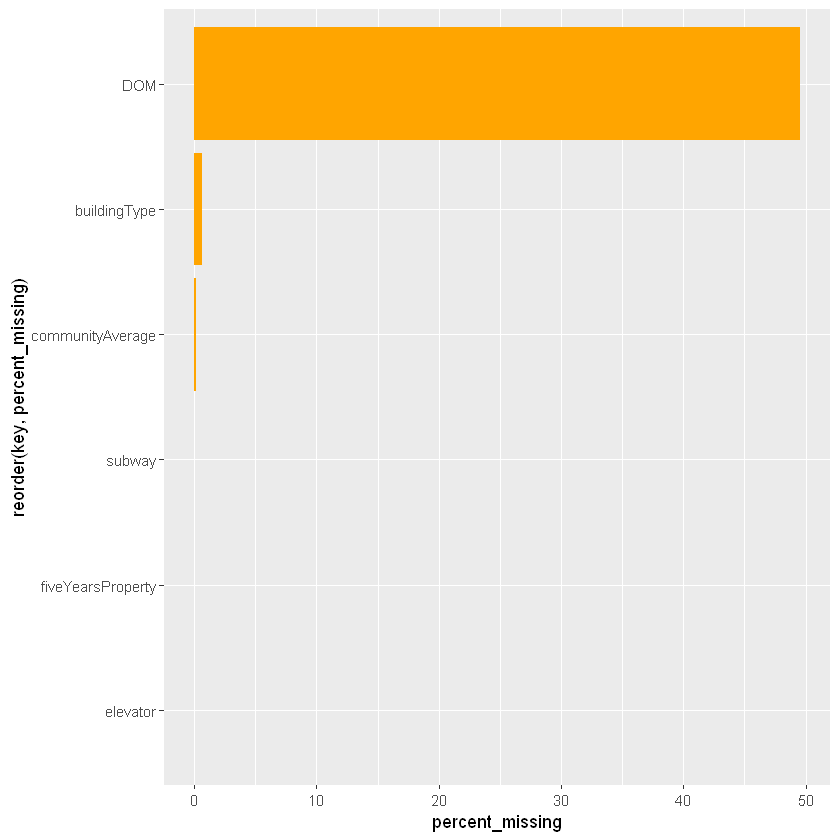

In [12]:
ggplot(x4,aes(x=reorder(key,percent_missing),y=percent_missing))+geom_bar(stat="identity",fill="orange")+coord_flip()

 <font color="red" size=3>50 per-cent of data was missing from the feature ”DOM” and less than 1 per-cent of the data were missing for other features

## Target Variable:Price- Distribution Evaluation

### Target Variable: Histogram

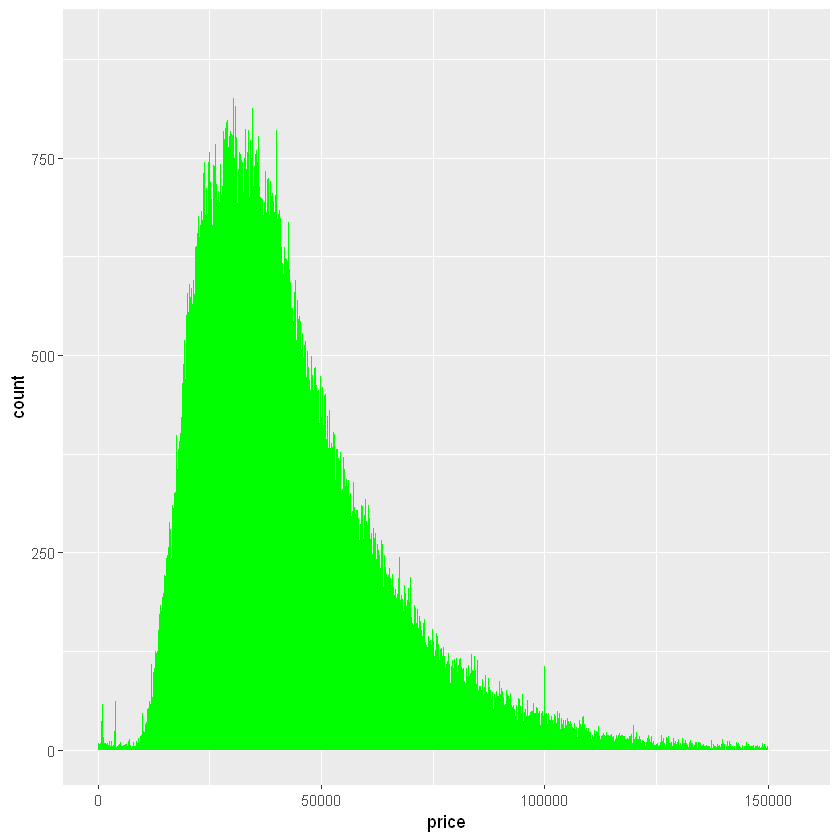

In [13]:
ggplot(data,aes(x=price)) + geom_histogram(binwidth=100,fill="green")

### Target Variable: QQ Plot

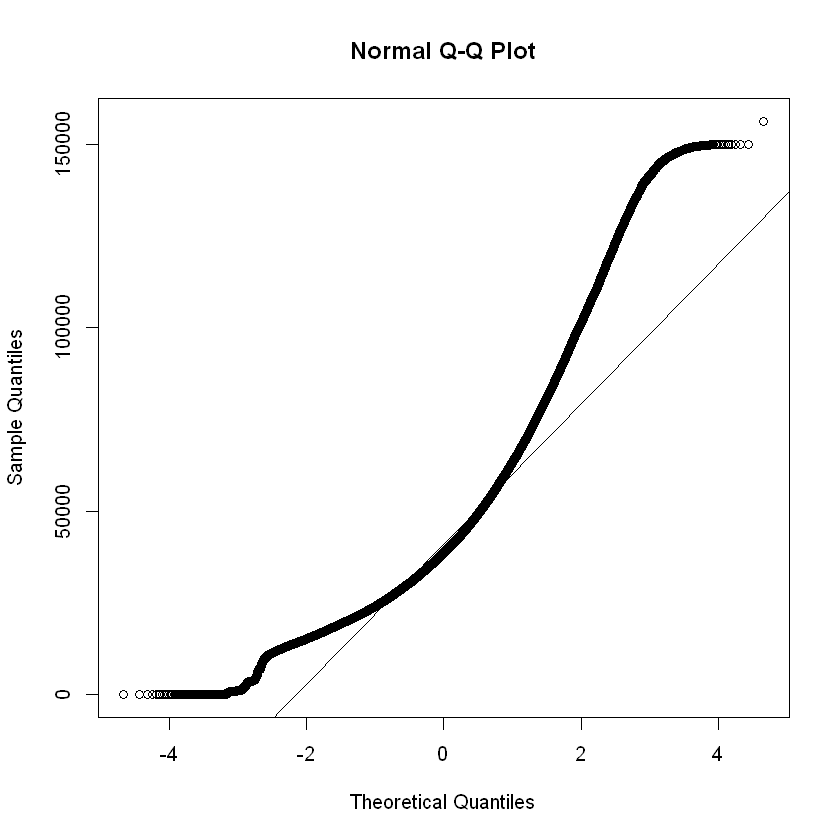

In [14]:
qqnorm(data$price)
qqline(data$price)

<font color="red" size=3>The price feature is not a normal distribution as the sample quantiles do not strictly fit the theoretical quantile line 

### Target Variable: Density plot

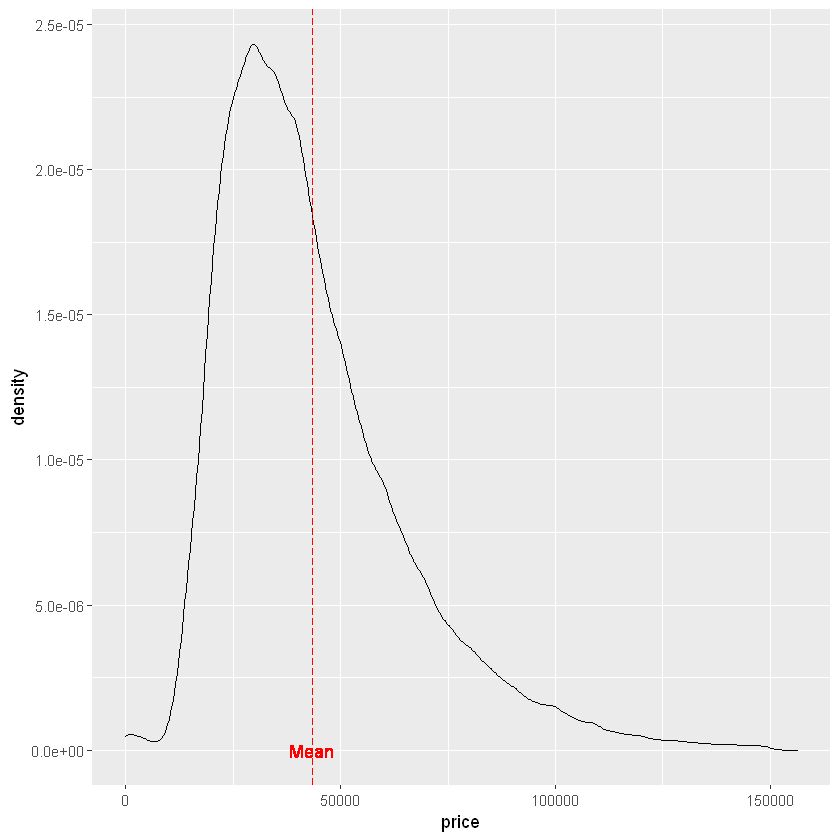

In [15]:
ggplot(data, aes(x=price))+geom_density()+geom_vline(xintercept=mean(data$price),color="red",linetype="longdash")+ geom_text(aes(x=mean(price),label="Mean",y=1*10**-10),color="red")

<font color="red" size=3>The price variable is right skewed with the following parameters:

In [16]:
cat("\n","Mean=",round(mean(data$price,na.rm=T),digits=0),"\n",    # mean of price
    "Standard deviation=",round(sd(data$price,na.rm=T),digits=0),"\n",
   "Minimum= ",min(data$price),"\n",
   "Maximum= ",max(data$price)) # standard deviation of price


 Mean= 43530 
 Standard deviation= 21709 
 Minimum=  1 
 Maximum=  156250

## Exploring Numeric Variables
There are 18 numeric variables in total initially

### Correlation Plot

In [17]:
num_data<-select_if(data, is.numeric) %>% select(-Lat,-Lng)

In [18]:
dim(num_data)

[1] 318851     16

In [19]:
# Corrplot does not work as our dataset has missing values, so removing those missing data
#Dropping DOM col
#num_data<-num_data[-1]
#removing rows with missing values
num_data<-na.omit(num_data)

In [20]:
print(dim(data))
print(dim(num_data))
print(((dim(data)[1]-dim(num_data)[1])/dim(data)[1])*100) # percent of data removed

[1] 318851     26
[1] 159376     16
[1] 50.01552


In [21]:
round(cor(num_data),2)

,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
Cid,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0,0.00,-0.02,0.01,-0.01,-0.01
DOM,0.00,1.00,0.47,0.23,0.22,0.08,0.01,-0.01,0.15,0.03,0,0.03,-0.04,0.01,0.00,0.03
followers,0.00,0.47,1.00,0.09,0.18,-0.07,0.02,0.01,0.17,-0.03,0,-0.03,0.07,0.03,-0.03,-0.01
totalPrice,0.00,0.23,0.09,1.00,0.61,0.59,0.11,-0.06,0.18,0.19,0,0.20,-0.02,0.13,0.03,0.47
price,0.00,0.22,0.18,0.61,1.00,-0.18,0.06,-0.05,0.19,0.02,0,0.04,-0.02,0.25,0.05,0.74
square,0.00,0.08,-0.07,0.59,-0.18,1.00,0.08,-0.02,0.04,0.17,0,0.19,0.01,-0.09,0.00,-0.13
kitchen,0.00,0.01,0.02,0.11,0.06,0.08,1.00,0.01,0.00,0.00,0,0.00,0.07,0.04,-0.07,0.05
buildingType,0.01,-0.01,0.01,-0.06,-0.05,-0.02,0.01,1.00,-0.02,-0.53,0,-0.62,-0.01,-0.15,0.05,-0.09
renovationCondition,0.00,0.15,0.17,0.18,0.19,0.04,0.00,-0.02,1.00,0.06,0,0.06,0.10,0.00,0.01,0.01
buildingStructure,0.01,0.03,-0.03,0.19,0.02,0.17,0.00,-0.53,0.06,1.00,0,0.82,-0.11,0.08,-0.11,0.05


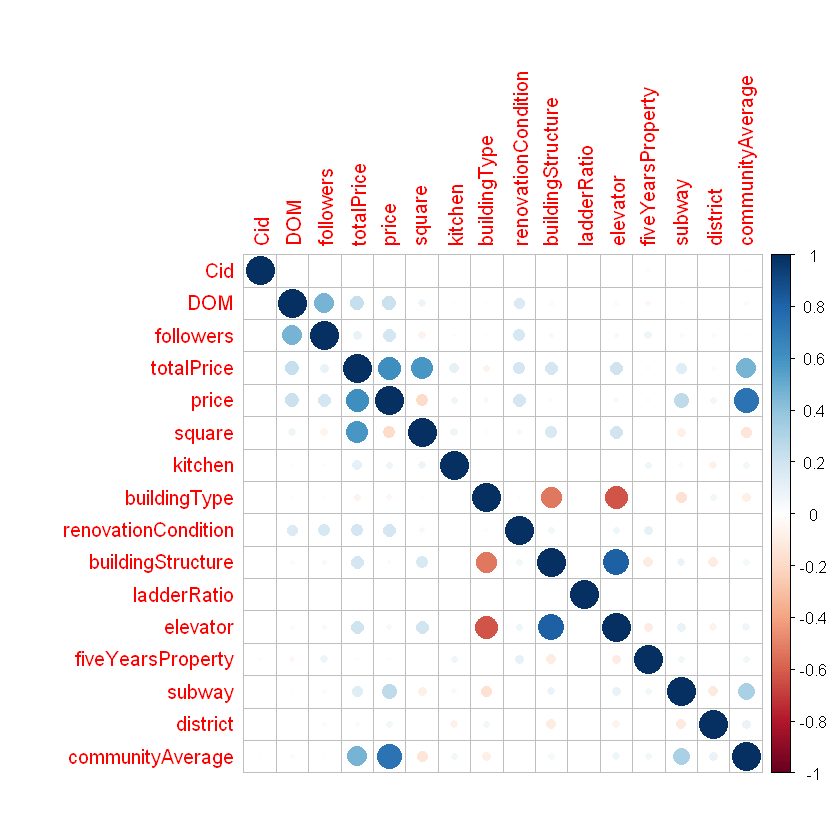

In [22]:
corrplot(cor(num_data),method="circle")

<font color="red" size=3> Lets see the transaction frequency in a plot

In [78]:
load("D:/1.2.IBM-ICE_CSP-DATA SCIENCE-Spring 2020/Z+PROJECT/Beijing/beijing_map.RData/beijing_map.RData",verbose = TRUE)

Loading objects:
  beijing


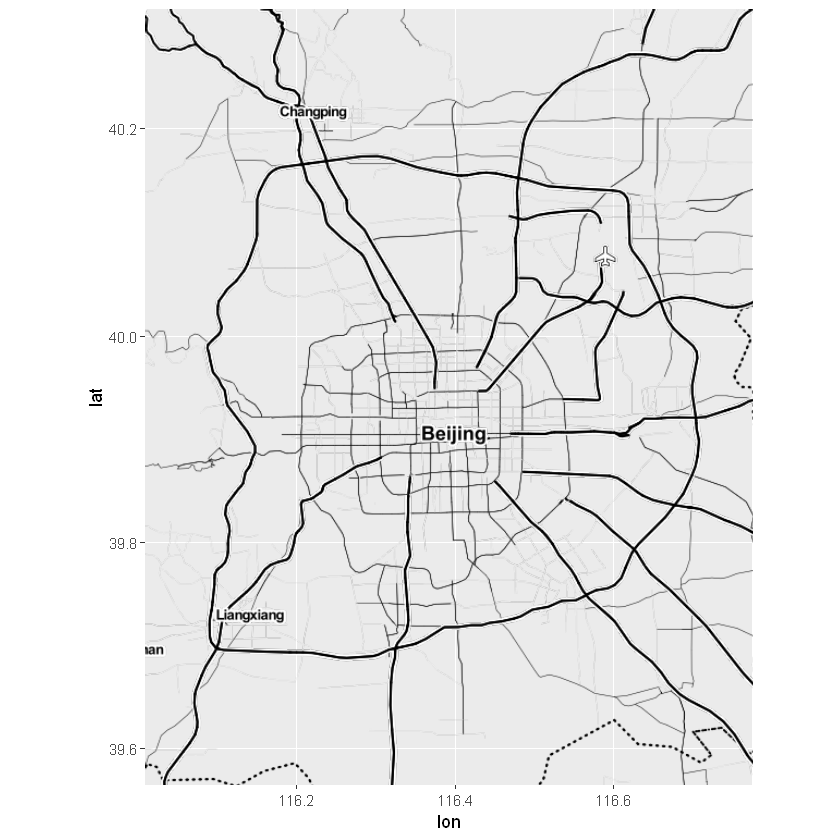

In [79]:
beijing

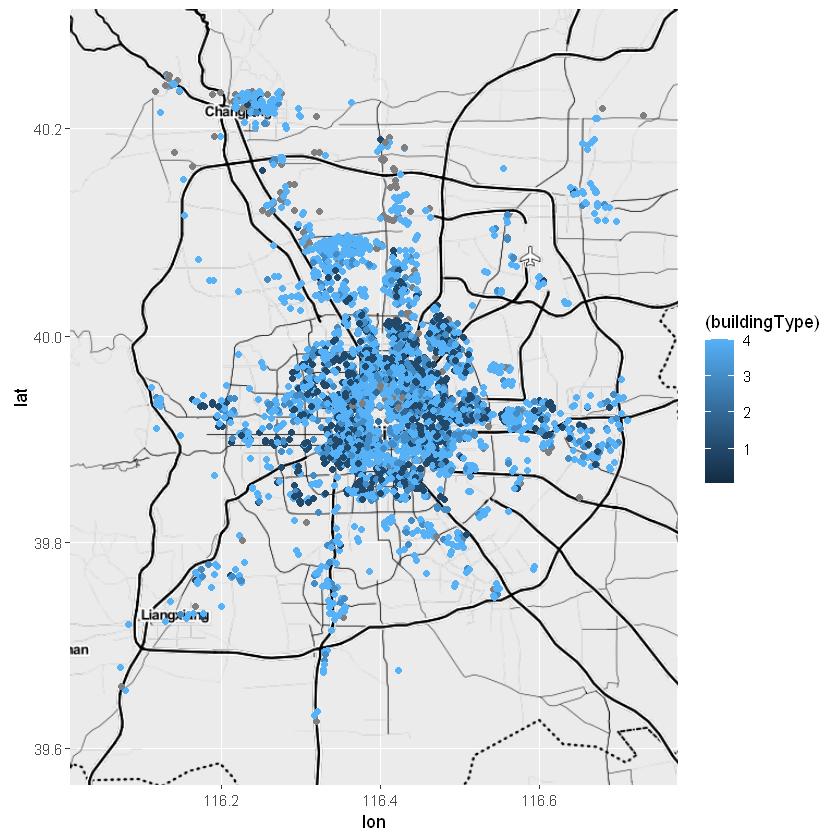

In [86]:
beijing+geom_point(data=data,aes(Lng, Lat, color = (buildingType)),alpha=1,na.rm=T)

<font color="red" size=3>Majority of the transactions (more than 70 per-cent) was in central Beijing. House purchases in central Beijing is highly volatile

<font color="red" size=6 >Day 2

## Categorical Variable Exploration

<font color="red" size=3> Initially there are 8 categorical variables in the dataset 
    

In [26]:
select_if(data,is.factor)%>% colnames()

[1] "url"              "id"               "tradeTime"        "livingRoom"      
[5] "drawingRoom"      "bathRoom"         "floor"            "constructionTime"

<font color="red" size=3>It is to be noted that some other variables are also categorical, but in the dataset they are not,converting them to categorial features

### 1.Exploring Community Id (Cid)
    There are a total of 4035 unique Cid's for the whole 318851

In [27]:
class(data$Cid)

[1] "numeric"

In [28]:
data$Cid<-as.factor(data$Cid)
class(data$Cid)

[1] "factor"

 ### 2.Exploring Active Days on market (DOM)

<font size=3>It has 50% of missing data, eliminating the column

In [29]:
data<-data[-7]

In [30]:
ncol(data)

[1] 25

### 3.Exploring Building Type

In [87]:
unique(data$buildingType)
cat("No of Building Type= ",length(unique(data$buildingType)))

[1] 1.000 4.000 3.000   NaN 2.000 0.500 0.333 0.125 0.250 0.429 0.048 0.375
[13] 0.667

No of Building Type=  13

<font color="red" size=3> Number of building type in data set was found to be 13, but the metadata mentions only 4 types, this issue was found to be encoding issues when converting from the Chinese to English

In [32]:
filter(data,data$buildingType == 0.5 )

url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,...,<dbl>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
https://bj.lianjia.com/chengjiao/BJ0000615040.html,BJ0000615040,116.1177,39.94115,1111052110644,2010-02-21,0,198.0,15729,125.89,...,0.5,1,0,0,0,NA,NA,NA,12,39492
https://bj.lianjia.com/chengjiao/BJ0000615138.html,BJ0000615138,116.1113,39.94992,1111027377794,2010-03-23,0,115.0,14240,80.76,...,0.5,0,0,0,0,NA,NA,NA,12,36923
https://bj.lianjia.com/chengjiao/BJ0000615220.html,BJ0000615220,116.1113,39.94992,1111027377794,2010-04-13,0,205.0,13021,157.44,...,0.5,0,0,0,0,NA,NA,NA,12,36923
https://bj.lianjia.com/chengjiao/BJ0000615222.html,BJ0000615222,116.1184,39.93789,1111043529456,2010-04-13,0,146.5,15985,91.65,...,0.5,1,0,0,0,NA,NA,NA,12,38753
https://bj.lianjia.com/chengjiao/BJ0000615401.html,BJ0000615401,116.1224,39.93738,1111027376723,2010-09-09,0,130.0,17640,73.70,...,0.5,0,0,0,0,NA,NA,NA,12,36358
https://bj.lianjia.com/chengjiao/BJ0000615595.html,BJ0000615595,116.1184,39.93789,1111043529456,2010-12-26,0,176.0,20540,85.69,...,0.5,1,0,0,0,NA,NA,NA,12,38753
https://bj.lianjia.com/chengjiao/BJ0000615635.html,BJ0000615635,116.1177,39.94115,1111052110644,2011-01-15,0,185.0,20627,89.69,...,0.5,1,0,0,0,NA,NA,NA,12,39492
https://bj.lianjia.com/chengjiao/BJ0000615998.html,BJ0000615998,116.1224,39.93738,1111027376723,2012-05-17,0,126.0,17218,73.18,...,0.5,0,0,0,0,NA,NA,NA,12,36358
https://bj.lianjia.com/chengjiao/BJ0000616423.html,BJ0000616423,116.1113,39.94992,1111027377794,2013-01-20,0,195.0,20147,96.79,...,0.5,0,0,0,0,NA,NA,NA,12,36923


<font color="red" size=3>As multiple features of building type with value 0.5 has NA values checking loss in data on omitting all the rows with NA values  

In [33]:
ncol(data)
nrow(data)

[1] 25

[1] 318851

In [34]:
data1<-na.omit(data)

In [35]:
ncol(data1)
nrow(data1)

[1] 25

[1] 316448

In [36]:
((nrow(data)-nrow(data1))/nrow(data))*100

[1] 0.7536436

<font size=3 color="red"> Only 0.75% of total data is lost

In [37]:
filter(data1,data1$buildingType == 0.5 )

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,...,<dbl>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>


In [38]:
colSums(is.na(data1))

url                  id                 Lng                 Lat 
                  0                   0                   0                   0 
                Cid           tradeTime           followers          totalPrice 
                  0                   0                   0                   0 
              price              square          livingRoom         drawingRoom 
                  0                   0                   0                   0 
            kitchen            bathRoom               floor        buildingType 
                  0                   0                   0                   0 
   constructionTime renovationCondition   buildingStructure         ladderRatio 
                  0                   0                   0                   0 
           elevator   fiveYearsProperty              subway            district 
                  0                   0                   0                   0 
   communityAverage 
                  0

In [39]:
unique(data1$buildingType)

[1] 1 4 3 2

<font size=3 color="red"> omitting these cause only 0.75 % loss of total data, also the building type now has 4 categories only as in the metadata

In [40]:
class(data1$buildingType)

[1] "numeric"

In [41]:
data1$buildingType<-as.factor(data1$buildingType)
class(data1$buildingType)

[1] "factor"

### 3.Exploring Number of people who follow transaction (followers)

In [42]:
#length(unique(data$followers))

In [43]:
#length(unique(data1$followers))

In [44]:
data1$followers<-as.numeric(data1$followers)
class(data1$followers)

[1] "numeric"

In [45]:
head(data1$tradeTime,3)

[1] 2016-08-09 2016-07-28 2016-12-11
2560 Levels: 2002-06-01 2002-07-06 2002-07-10 2003-07-31 ... 2018-01-28

<font color="red" size=3>Change tradeTime into date format

In [46]:
data1$tradeTime<-as.Date(data1$tradeTime)

In [47]:
class(data1$tradeTime)

[1] "Date"

<font color="red" size=3> creating new features month and year

In [48]:
data1<-data1 %>% mutate(month=format(tradeTime,"%m"),year=format(tradeTime,"%y"))

In [49]:
head(data1,3)

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,...,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,month,year
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<date>,<dbl>,<dbl>,<int>,<dbl>,...,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
1,https://bj.lianjia.com/chengjiao/101084782030.html,101084782030,116.4755,40.01952,1111027376244,2016-08-09,106,415,31680,131.00,...,3,6,0.217,1,0,1,7,56021,08,16
2,https://bj.lianjia.com/chengjiao/101086012217.html,101086012217,116.4539,39.88153,1111027381879,2016-07-28,126,575,43436,132.38,...,4,6,0.667,1,1,0,7,71539,07,16
3,https://bj.lianjia.com/chengjiao/101086041636.html,101086041636,116.5620,39.87714,1111040862969,2016-12-11,48,1030,52021,198.00,...,3,6,0.500,1,0,0,7,48160,12,16


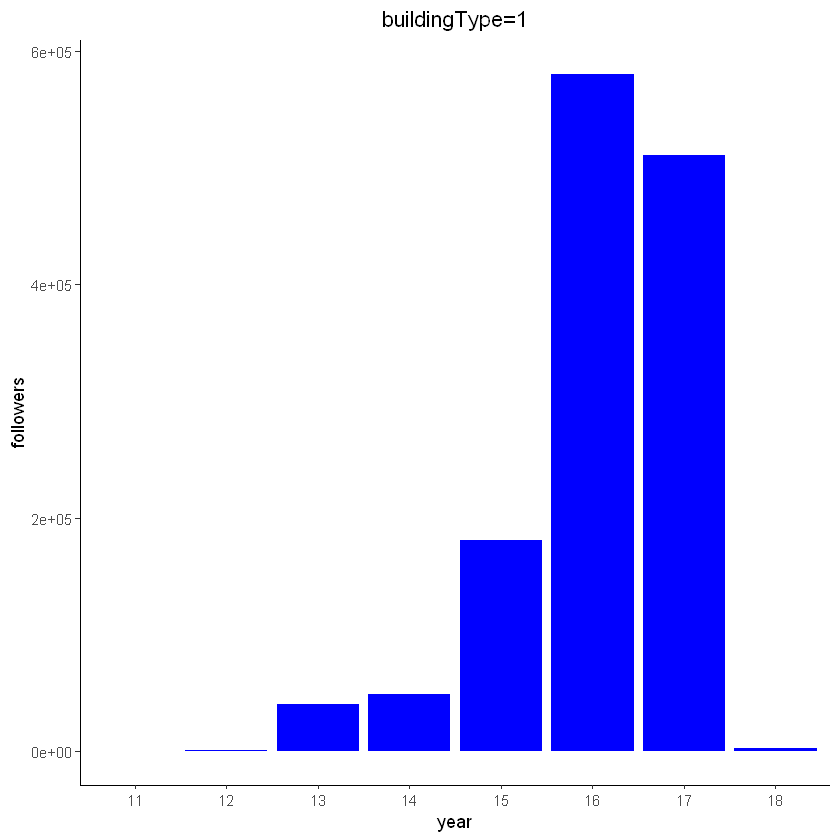

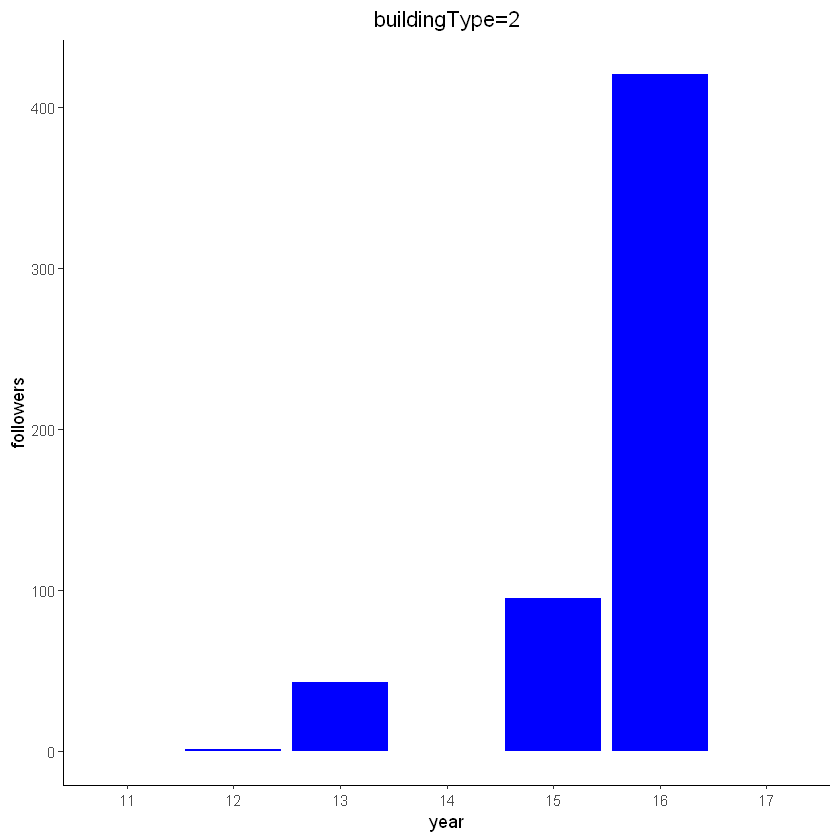

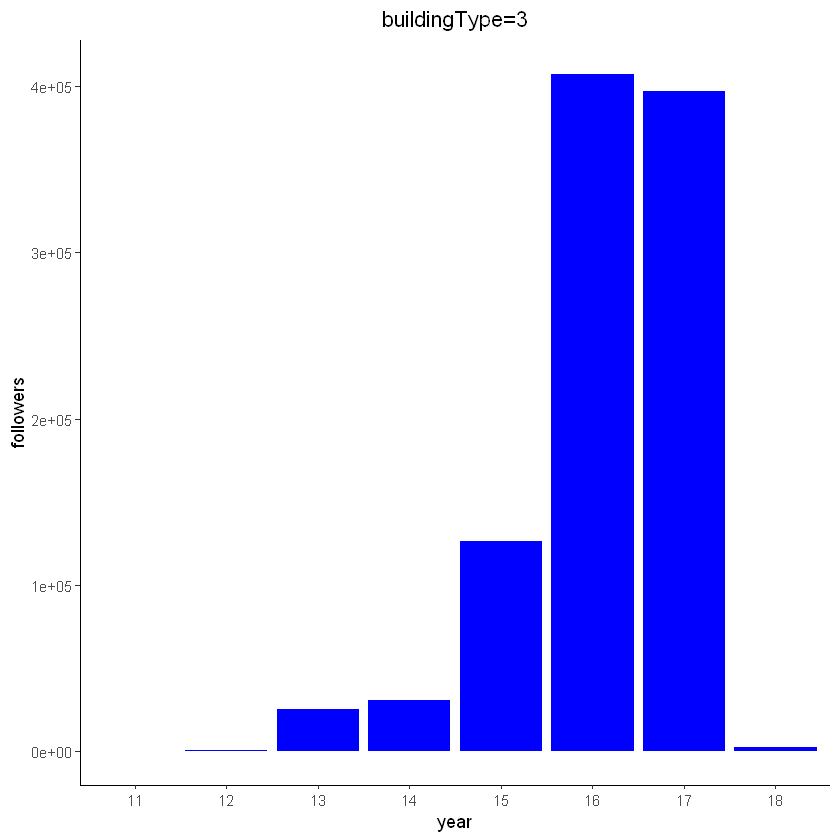

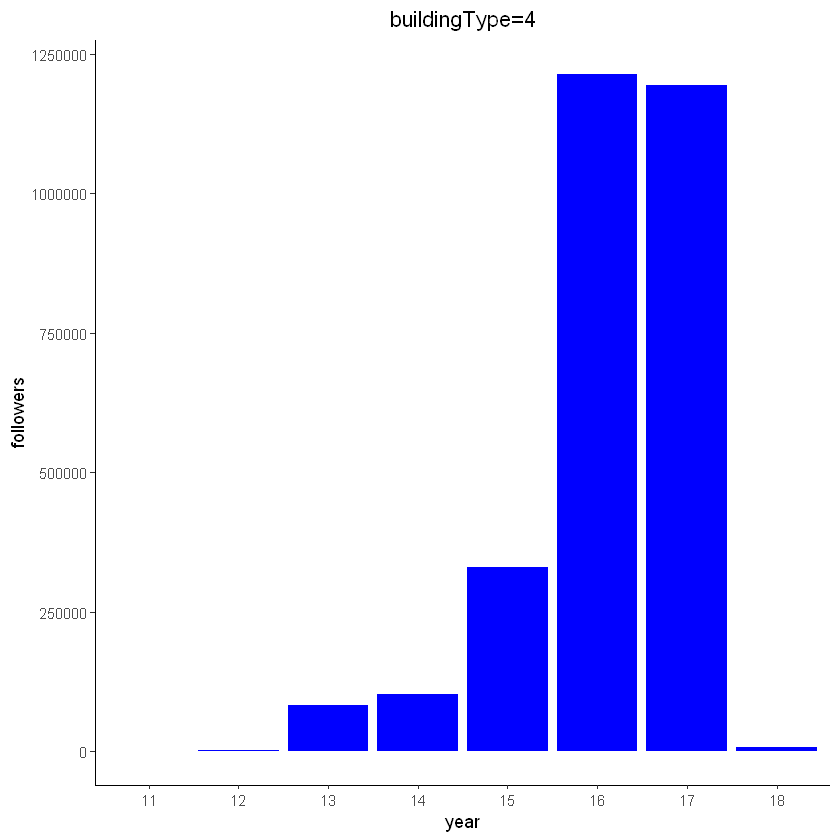

In [50]:
ggplot(filter(data1,buildingType==1 & year>=11),aes(x=year,y=followers))+geom_bar(stat="identity",fill=" blue")+
theme_classic()+ggtitle("buildingType=1")+theme(plot.title=element_text(hjust=0.5))
ggplot(filter(data1,buildingType==2 & year>=11),aes(x=year,y=followers))+geom_bar(stat="identity",fill=" blue")+
theme_classic()+ggtitle("buildingType=2")+
theme(plot.title=element_text(hjust=0.5))
ggplot(filter(data1,buildingType==3 & year>=11),aes(x=year,y=followers))+geom_bar(stat="identity",fill=" blue")+
theme_classic()+ggtitle("buildingType=3")+
theme(plot.title=element_text(hjust=0.5))
ggplot(filter(data1,buildingType==4 & year>=11),aes(x=year,y=followers))+geom_bar(stat="identity",fill=" blue")+
theme_classic()+ggtitle("buildingType=4")+
theme(plot.title=element_text(hjust=0.5))

In [51]:
cat("Sample Size for 2018 = ",nrow(filter(data1,year==18)))
cat("\nSample size for building 2 for year 2017 = ",nrow(filter(data1,year==17 & buildingType == 2)),"\n")
cat("No of followers for year= 2017 & buildingType=1 is ",sum(select((filter(data1,year==17 & buildingType ==1)),followers)),"\n")
cat("No of followers for year= 2017 & buildingType=2 is ",sum(select((filter(data1,year==17 & buildingType ==2)),followers)),"\n")
cat("No of followers for year= 2017 & buildingType=3 is ",sum(select((filter(data1,year==17 & buildingType ==3)),followers)),"\n")
cat("No of followers for year= 2017 & buildingType=4 is ",sum(select((filter(data1,year==17 & buildingType ==4)),followers)),"\n")

Sample Size for 2018 =  219
Sample size for building 2 for year 2017 =  1 
No of followers for year= 2017 & buildingType=1 is  510718 
No of followers for year= 2017 & buildingType=2 is  0 
No of followers for year= 2017 & buildingType=3 is  397201 
No of followers for year= 2017 & buildingType=4 is  1193422 


#### 1.No of samples for year 2018 is very less also, 
####  2.No of samples  for year 2017 for buiding Type 2,is very small
<font color="red" size=3>At the end of year 2017 building type 4 has more followers

<font color="red" size=3> It was found that sample size for year 2018 was only 219 compared to a total of 318851 entries. So the sampling had to done properly to ensure that a best ﬁt curve with maximum accuracy was obtained from the data set for the prediction. 

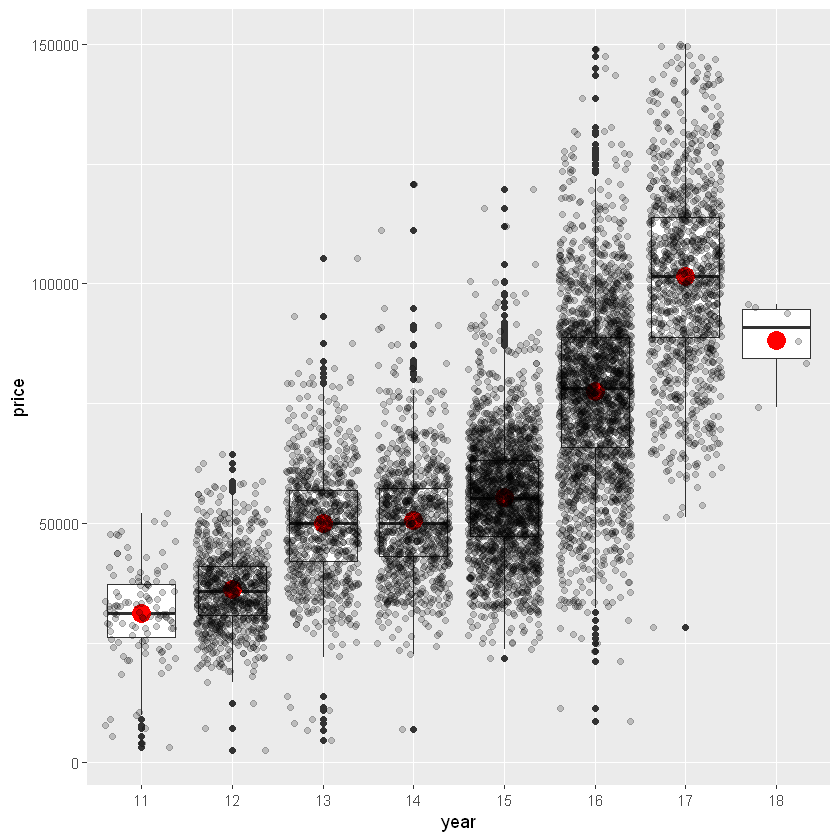

In [52]:
a1<-filter(data1,district==1 & buildingType==4)
ggplot(a1,aes(x=year,y=price))+geom_boxplot()+
    stat_summary(fun=mean, geom="point" ,size=5, color="red", fill="red")+
    geom_jitter(alpha=0.2)

<font color="red" size=3> the box plot shows price variation throughout the years and points indicate the transaction frequency for each particular year

### 4.Exploring Number of kitchen (kitchen)

In [53]:
unique(data$kitchen)

[1] 1 0 2 4 3

In [54]:
filter(data,kitchen==4)

url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,...,<dbl>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
https://bj.lianjia.com/chengjiao/101092094263.html,101092094263,116.4330,40.02177,1111027375015,2016-07-18,3,2400.0,48422,495.65,...,NaN,Î´Öª,4,1,0.5,0,0,0,7,61877
https://bj.lianjia.com/chengjiao/BJ0000615084.html,BJ0000615084,116.1220,39.93976,1111027375862,2010-03-07,0,136.0,14601,93.15,...,0.333,1,0,0,0.0,NA,NA,NA,12,37588
https://bj.lianjia.com/chengjiao/BJ0000615132.html,BJ0000615132,116.1184,39.93789,1111043529456,2010-03-22,0,127.0,14613,86.91,...,0.333,1,0,0,0.0,NA,NA,NA,12,38753
https://bj.lianjia.com/chengjiao/BJ0000615138.html,BJ0000615138,116.1113,39.94992,1111027377794,2010-03-23,0,115.0,14240,80.76,...,0.500,0,0,0,0.0,NA,NA,NA,12,36923
https://bj.lianjia.com/chengjiao/BJ0000615220.html,BJ0000615220,116.1113,39.94992,1111027377794,2010-04-13,0,205.0,13021,157.44,...,0.500,0,0,0,0.0,NA,NA,NA,12,36923
https://bj.lianjia.com/chengjiao/BJ0000615222.html,BJ0000615222,116.1184,39.93789,1111043529456,2010-04-13,0,146.5,15985,91.65,...,0.500,1,0,0,0.0,NA,NA,NA,12,38753
https://bj.lianjia.com/chengjiao/BJ0000615229.html,BJ0000615229,116.1170,39.93386,1111052073923,2010-04-17,0,90.0,14288,62.99,...,0.333,0,0,0,0.0,NA,NA,NA,12,39381
https://bj.lianjia.com/chengjiao/BJ0000615401.html,BJ0000615401,116.1224,39.93738,1111027376723,2010-09-09,0,130.0,17640,73.70,...,0.500,0,0,0,0.0,NA,NA,NA,12,36358
https://bj.lianjia.com/chengjiao/BJ0000615469.html,BJ0000615469,116.1170,39.93386,1111052073923,2010-10-21,0,126.8,15849,80.01,...,0.333,0,0,0,0.0,NA,NA,NA,12,39381


<font color="green" size=3>For "4" no of kitchen, there are 24 rows,but multiple features have NA values, also the building type   has erronious values (like 0.500,0.333,0.250) so eliminating the rows with NA values eliminates 4 no of kitchen

In [55]:
unique(data1$kitchen)

[1] 1 0 2 3

In [56]:
class(data1$kitchen)

[1] "integer"

In [57]:
data1$kitchen<-as.factor(data1$kitchen)
class(data1$kitchen)

[1] "factor"

### 6.renovationCondition

In [58]:
class(data1$renovationCondition)

[1] "integer"

In [59]:
data1$renovationCondition<-as.factor(data1$renovationCondition)
class(data1$renovationCondition)

[1] "factor"

### 7.buildingStructure

In [60]:
class(data1$buildingStructure)

[1] "integer"

In [61]:
data1$buildingStructure<-as.factor(data1$buildingStructure)
class(data1$buildingStructure)

[1] "factor"

### 8.elevator

In [62]:
class(data1$elevator)

[1] "numeric"

In [63]:
data1$elevator<-as.factor(data1$elevator)
class(data1$elevator)

[1] "factor"

### 9.fiveYearsProperty

In [64]:
class(data1$fiveYearsProperty)

[1] "numeric"

In [65]:
data1$fiveYearsProperty<-as.factor(data1$fiveYearsProperty)
class(data1$fiveYearsProperty)

[1] "factor"

In [66]:
unique(data1$subway)

[1] 1 0

### 10.subway

In [67]:
class(data1$subway)

[1] "numeric"

In [68]:
data1$subway<-as.factor(data1$subway)
class(data1$subway)

[1] "factor"

### 11.district

In [69]:
class(data1$district)

[1] "integer"

In [70]:
data1$district<-as.factor(data1$district)
class(data1$district)

[1] "factor"

### Checking number of categorical variables

In [71]:
select_if(data1,is.factor)%>%colnames()%>%length

[1] 16

<font color="red" size=3 >Now,there are a total of 10 categorical variables

In [72]:
str(data1)

'data.frame':	316448 obs. of  27 variables:
 $ url                : Factor w/ 318851 levels "https://bj.lianjia.com/chengjiao/101084782030.html",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ id                 : Factor w/ 318851 levels "101084782030",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Lng                : num  116 116 117 116 116 ...
 $ Lat                : num  40 39.9 39.9 40.1 39.9 ...
 $ Cid                : Factor w/ 4035 levels "1111027373683",..: 1102 3326 3633 3731 3083 1621 2907 3326 2490 354 ...
 $ tradeTime          : Date, format: "2016-08-09" "2016-07-28" ...
 $ followers          : num  106 126 48 138 286 57 167 138 218 134 ...
 $ totalPrice         : num  415 575 1030 298 392 ...
 $ price              : int  31680 43436 52021 22202 48396 52000 37672 49521 27917 55883 ...
 $ square             : num  131 132 198 134 81 ...
 $ livingRoom         : Factor w/ 11 levels "#NAME?","0","1",..: 4 4 5 5 4 3 4 5 3 3 ...
 $ drawingRoom        : Factor w/ 22 levels "¸ß 12","¸ß 14",..: 12 13 13 12 12 

In [73]:
length(select_if(data1,is.factor)%>%colnames)

[1] 16

<font color="red" size=3> There are 16 categorical features

In [74]:
length(select_if(data1,is.numeric)%>%colnames)

[1] 8

<font color="red" size=3> There are 8 numeric features

In [75]:
length(select_if(data1,is.character)%>%colnames)

[1] 2

<font color="red" size=3> There are 2 character features